In [ ]:
import pandas as pd

1. csv 폴더에서 tran_1, tran_2을 로드 
2. tran_1, tran_2의 데이터 테이블의 형태는 같은 형태임으로 단순한 행 결합을 이용하여 데이터프레임을 결합
3. tran_d_1, tran_d_2 파일을 로드 
4. 같은 데이터의 형태임으로 단순한 행 결합을 이용하여 데이터프레임을 생성 
5. 2번과정과 4번과정에서 합쳐진 데이터프레임을 특정한 조건에 맞춰서 열을 결합하여 데이터프레임을 생성

In [ ]:
# tran_1, tran_2 파일을 로드 
tran_1 = pd.read_csv("../csv/tran_1.csv")
tran_2 = pd.read_csv("../csv/tran_2.csv")

In [ ]:
tran_1.head(1)

In [ ]:
tran_2.head(1)

In [ ]:
## tran_1, tran_2 단순한 행 결합
tran = pd.concat([tran_1, tran_2], axis=0, ignore_index=True)

In [ ]:
#tran_d_1, tran_d_2 로드 
tran_d_1 = pd.read_csv("../csv/tran_d_1.csv")
tran_d_2 = pd.read_csv("../csv/tran_d_2.csv")

In [ ]:
tran_d_1.head(1)

In [ ]:
tran_d_2.head(1)

In [ ]:
## tran_d_1, tran_d_2 단순한 행 결합 
tran_d = pd.concat([tran_d_1, tran_d_2], axis=0, ignore_index=True)

In [ ]:
tran.head(1)

In [ ]:
tran_d.head(1)

In [ ]:
## transaction_id의 값이 같은 조건으로 2개의 데이터프레임 열 결합
transaction = pd.merge(tran, tran_d, on='transaction_id', how = 'left')

1. item_master 파일을 로드 
2. transaction 데이터프레임과 item_master 특정한 조건에 맞게 열 결합
3. use_log 파일을 로드 
4. 2번 과정에서 결합된 데이터프레임에 특정한 조건에 맞게 열 결합

In [ ]:
item_master = pd.read_csv("../csv/item_master.csv")
use_log = pd.read_csv("../csv/use_log.csv")

In [ ]:
item_master.head(1)

In [ ]:
transaction.head(1)

In [ ]:
total_df = pd.merge(transaction, item_master, on='item_id', how="left")

In [ ]:
use_log.head(1)

In [ ]:
total_df.head(1)

In [ ]:
total_df = pd.merge(total_df, use_log, on='customer_id', how='left')

In [34]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287583 entries, 0 to 287582
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   transaction_id  287583 non-null  object        
 1   price           287583 non-null  int64         
 2   payment_date    287583 non-null  datetime64[ns]
 3   customer_id     287583 non-null  object        
 4   detail_id       287583 non-null  int64         
 5   item_id         287583 non-null  object        
 6   quantity        287583 non-null  int64         
 7   item_name       287583 non-null  object        
 8   item_price      287583 non-null  int64         
 9   log_id          286508 non-null  object        
 10  usedate         286508 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 24.1+ MB


In [ ]:
total_df.head(1)

In [ ]:
## payment_date를 시계열 데이터로 데이터 형태를 변환
## pd.to_datetime(변경할 데이터 변수, format={변경할 데이터의 형태})
total_df['payment_date'] = pd.to_datetime(
    total_df['payment_date'], 
    format = "%Y-%m-%d %H:%M:%S")


In [ ]:
total_df.info()

In [61]:
## payment_date에서 '년-월' 따로 추출 -> payment_month 컬럼을 생성
total_df['payment_month'] = total_df['payment_date'].dt.strftime("%Y-%m")

In [ ]:
## 문자열인 경우 년-월 추출하려면?
total_df['usedate'].str[0:7]

1. payment_month를 기준으로 데이터프레임 그룹화
2. price의 합계 출력
3. mapplotlib을 이용하여 데이터 시각화

In [69]:
group_data = total_df[['payment_month', 'price']].groupby('payment_month').sum()

In [70]:
import matplotlib.pyplot as plt

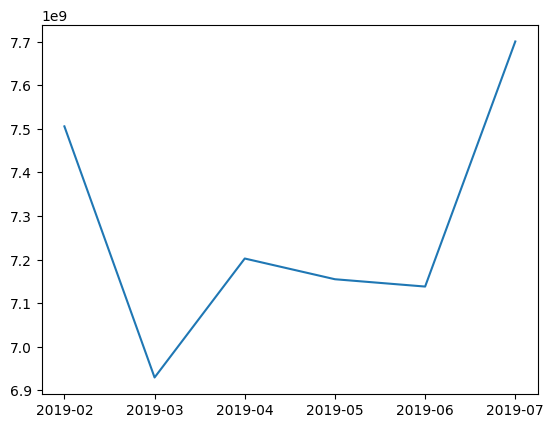

In [71]:
plt.plot(group_data['price'])
plt.show()